<a href="https://colab.research.google.com/github/AngelTroncoso/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#📌 Extracción

In [123]:
import pandas as pd

In [124]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [77]:
df['Churn'].apply(type).value_counts()


,count
Churn,
<class 'str'>,7267


In [125]:
df['Churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [126]:
df = df[df['Churn'].str.strip() != '']


In [127]:
print(df['Churn'].unique())
# Salida esperada: ['No', 'Yes']


['No' 'Yes']


In [128]:
df['Churn'].dtype
# Salida esperada: dtype('O')


dtype('O')

#🔧 Transformación

In [129]:
df = pd.json_normalize(df.to_dict(orient='records'))
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [130]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


#📊 Carga y análisis

1. **Ver Datos Generales:**

In [131]:
rename_dict = {
    'customerID': 'ID_cliente',
    'Churn': 'Cancelado',
    'customer.gender': 'Género',
    'customer.SeniorCitizen': 'Adulto_mayor',
    'customer.Partner': 'Tiene_pareja',
    'customer.Dependents': 'Tiene_dependientes',
    'customer.tenure': 'Antigüedad_meses',

    'phone.PhoneService': 'Servicio_telefonía',
    'phone.MultipleLines': 'Líneas_múltiples',

    'internet.InternetService': 'Servicio_internet',
    'internet.OnlineSecurity': 'Seguridad_en_línea',
    'internet.OnlineBackup': 'Respaldo_en_línea',
    'internet.DeviceProtection': 'Protección_dispositivos',
    'internet.TechSupport': 'Soporte_técnico',
    'internet.StreamingTV': 'TV_en_streaming',
    'internet.StreamingMovies': 'Películas_en_streaming',

    'account.Contract': 'Tipo_contrato',
    'account.PaperlessBilling': 'Factura_sin_papel',
    'account.PaymentMethod': 'Método_pago',
    'account.Charges.Monthly': 'Cargo_mensual',
    'account.Charges.Total': 'Cargo_total'
}


In [132]:
df = df.rename(columns=rename_dict)


In [133]:
df.shape

(7043, 21)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_cliente               7043 non-null   object 
 1   Cancelado                7043 non-null   object 
 2   Género                   7043 non-null   object 
 3   Adulto_mayor             7043 non-null   int64  
 4   Tiene_pareja             7043 non-null   object 
 5   Tiene_dependientes       7043 non-null   object 
 6   Antigüedad_meses         7043 non-null   int64  
 7   Servicio_telefonía       7043 non-null   object 
 8   Líneas_múltiples         7043 non-null   object 
 9   Servicio_internet        7043 non-null   object 
 10  Seguridad_en_línea       7043 non-null   object 
 11  Respaldo_en_línea        7043 non-null   object 
 12  Protección_dispositivos  7043 non-null   object 
 13  Soporte_técnico          7043 non-null   object 
 14  TV_en_streaming         

In [135]:
df['Cancelado'].unique()

array(['No', 'Yes'], dtype=object)

2.**Valores Nulos:**

In [136]:
df.isnull().sum()

,0
ID_cliente,0
Cancelado,0
Género,0
Adulto_mayor,0
Tiene_pareja,0
Tiene_dependientes,0
Antigüedad_meses,0
Servicio_telefonía,0
Líneas_múltiples,0
Servicio_internet,0


3.**Tipos de datos por grupos:**

In [137]:
df.dtypes

,0
ID_cliente,object
Cancelado,object
Género,object
Adulto_mayor,int64
Tiene_pareja,object
Tiene_dependientes,object
Antigüedad_meses,int64
Servicio_telefonía,object
Líneas_múltiples,object
Servicio_internet,object


In [138]:
df['Cargo_total'] = df['Cargo_total'].str.replace(',', '.', regex=False)

In [139]:
df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')

In [140]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Respaldo_en_línea,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [141]:
df.dtypes

,0
ID_cliente,object
Cancelado,object
Género,object
Adulto_mayor,int64
Tiene_pareja,object
Tiene_dependientes,object
Antigüedad_meses,int64
Servicio_telefonía,object
Líneas_múltiples,object
Servicio_internet,object


In [142]:
for col in df.columns:
    print(f"\n📌 Columna: {col}")
    print(df[col].unique())



📌 Columna: ID_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

📌 Columna: Cancelado
['No' 'Yes']

📌 Columna: Género
['Female' 'Male']

📌 Columna: Adulto_mayor
[0 1]

📌 Columna: Tiene_pareja
['Yes' 'No']

📌 Columna: Tiene_dependientes
['Yes' 'No']

📌 Columna: Antigüedad_meses
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

📌 Columna: Servicio_telefonía
['Yes' 'No']

📌 Columna: Líneas_múltiples
['No' 'Yes' 'No phone service']

📌 Columna: Servicio_internet
['DSL' 'Fiber optic' 'No']

📌 Columna: Seguridad_en_línea
['No' 'Yes' 'No internet service']

📌 Columna: Respaldo_en_línea
['Yes' 'No' 'No internet service']

📌 Columna: Protección_dispositivos
['No' 'Yes' 'No internet service']

📌 Columna: Soporte_técnico
['Yes' 'No' 'No internet service']

📌 Columna: TV_en_streaming

In [143]:
df['Cancelado'].value_counts(dropna=False)


,count
Cancelado,
No,5174
Yes,1869


**Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.**

 📊Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.  

📌 ¿Por qué esto es útil?
Puedes ver si los clientes que cancelaron (Cancelado == 'Yes') tienen gastos diarios más altos o más bajos.

📌Es útil para segmentación, predicción de cancelación y clasificación de tipos de clientes.

In [144]:
#Asumimos 30 días promedio por mes:
df['Cuentas_Diarias'] = df['Cargo_mensual'] / 30


In [145]:
#validación rápida
print(df[['Cargo_mensual', 'Cuentas_Diarias']].head())


   Cargo_mensual  Cuentas_Diarias
0           65.6         2.186667
1           59.9         1.996667
2           73.9         2.463333
3           98.0         3.266667
4           83.9         2.796667


In [146]:
#Resumen estadístico
df['Cuentas_Diarias'].describe()


,Cuentas_Diarias
count,7043.000000
mean,2.158723
std,1.003002
min,0.608333
25%,1.183333
50%,2.345000
75%,2.995000
max,3.958333


In [147]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


**2.Transformar datos para Machine Learning**

In [148]:
#separar datos tipos object y darle una variable de asignacion para extración con cikitlearn
obj_cols = df.select_dtypes(include='object').columns
print("Columnas tipo object:\n", obj_cols)


Columnas tipo object:
 Index(['ID_cliente', 'Cancelado', 'Género', 'Tiene_pareja',
       'Tiene_dependientes', 'Servicio_telefonía', 'Líneas_múltiples',
       'Servicio_internet', 'Seguridad_en_línea', 'Respaldo_en_línea',
       'Protección_dispositivos', 'Soporte_técnico', 'TV_en_streaming',
       'Películas_en_streaming', 'Tipo_contrato', 'Factura_sin_papel',
       'Método_pago'],
      dtype='object')


In [149]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in obj_cols:
    try:
        df[col] = le.fit_transform(df[col])
    except:
        print(f"No se pudo transformar: {col}")


In [150]:
df.nunique()


,0
ID_cliente,7043
Cancelado,2
Género,2
Adulto_mayor,2
Tiene_pareja,2
Tiene_dependientes,2
Antigüedad_meses,73
Servicio_telefonía,2
Líneas_múltiples,3
Servicio_internet,3


In [151]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0,0,0,0,1,1,9,1,0,0,...,0,2,2,0,1,1,3,65.6,593.30,2.186667
1,1,0,1,0,0,0,9,1,2,0,...,0,0,0,2,0,0,3,59.9,542.40,1.996667
2,2,1,1,0,0,0,4,1,0,1,...,2,0,0,0,0,1,2,73.9,280.85,2.463333
3,3,1,1,1,1,0,13,1,0,1,...,2,0,2,2,0,1,2,98.0,1237.85,3.266667
4,4,1,0,1,1,0,3,1,0,1,...,0,2,2,0,0,1,3,83.9,267.40,2.796667


In [152]:
df.describe()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,3521.000000,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,2.158723
std,2033.283305,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,1.183333
50%,3521.000000,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,2.345000
75%,5281.500000,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,2.995000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


**📉 Entender la distribución de Churn (evasión de clientes) es fundamental para todo análisis de comportamiento o predicción.**

In [153]:
df.dtypes

,0
ID_cliente,int64
Cancelado,int64
Género,int64
Adulto_mayor,int64
Tiene_pareja,int64
Tiene_dependientes,int64
Antigüedad_meses,int64
Servicio_telefonía,int64
Líneas_múltiples,int64
Servicio_internet,int64


#📄Informe final

**#Análisis de Correlaciones**

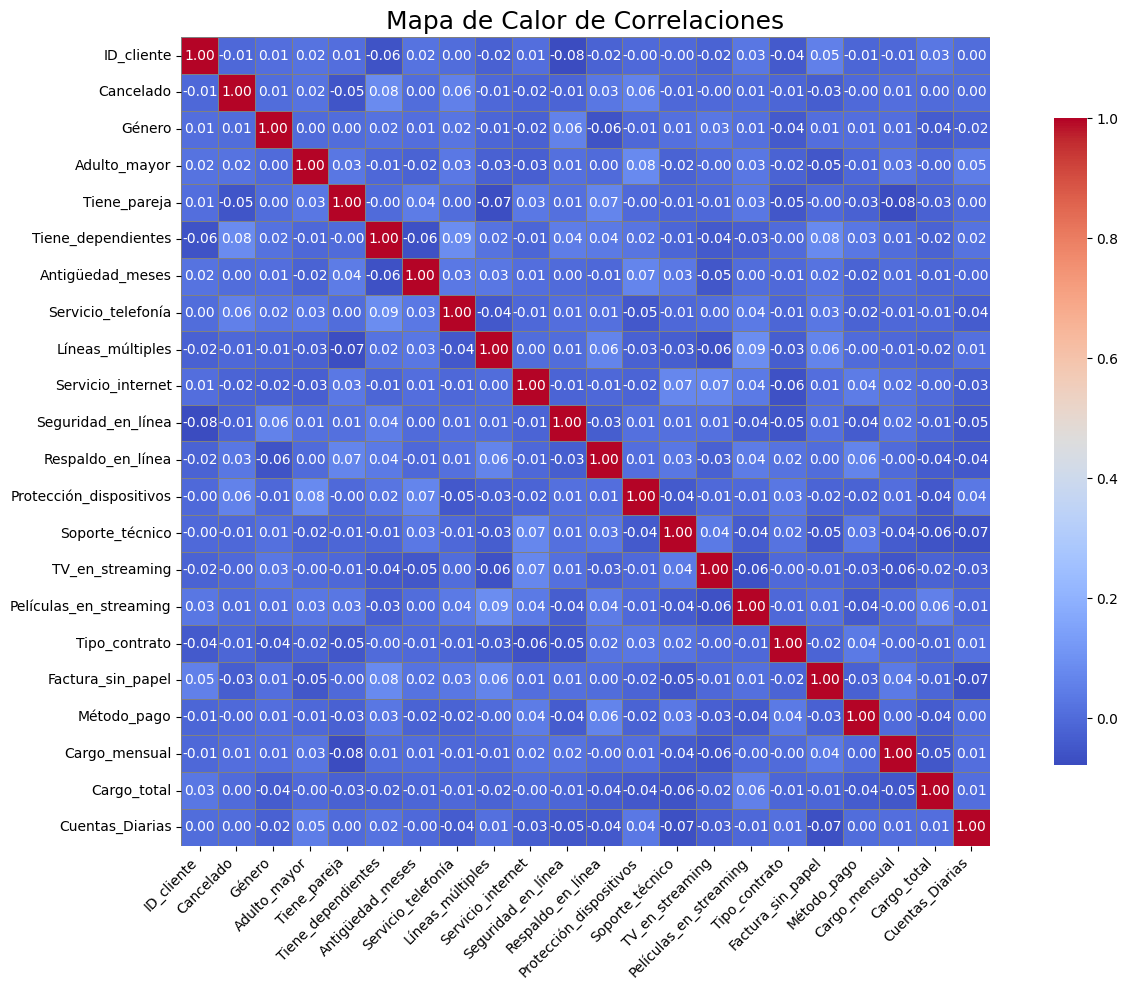

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Tamaño del gráfico
plt.figure(figsize=(14, 10))

# Mapa de calor
sns.heatmap(correlation_matrix,
            annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, linecolor='gray',
            square=True, cbar_kws={"shrink": 0.8})

plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Top 5 variables más correlacionadas con Cancelado:

Tiene_dependientes         0.082476
Protección_dispositivos    0.057814
Servicio_telefonía         0.055698
Tiene_pareja              -0.053032
Factura_sin_papel         -0.034455
Name: Cancelado, dtype: float64


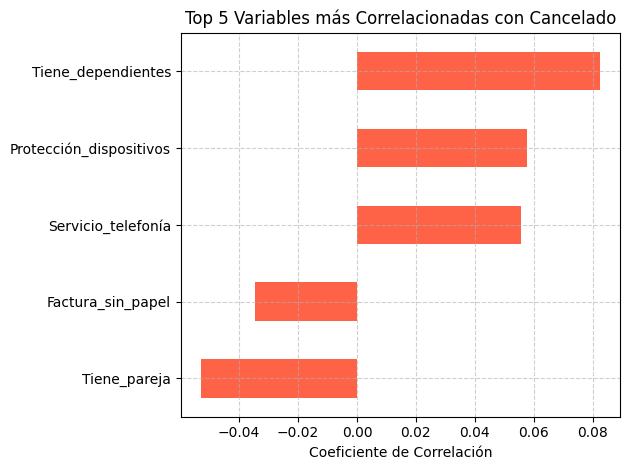

In [156]:
# Calculamos las correlaciones
correlaciones = df.corr(numeric_only=True)['Cancelado'].drop('Cancelado')

# Ordenamos por la magnitud de la correlación
top_5 = correlaciones.abs().sort_values(ascending=False).head(5)
top_5_valores = correlaciones[top_5.index]

# Mostramos resultados
print("Top 5 variables más correlacionadas con Cancelado:\n")
print(top_5_valores)

# Gráfico de barras para visualización
top_5_valores.sort_values().plot(kind='barh', color='tomato')
plt.title('Top 5 Variables más Correlacionadas con Cancelado')
plt.xlabel('Coeficiente de Correlación')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#**Concluciones:**

**🎯 Análisis Rápido de Correlaciones:**
1. Tiene_dependientes (+0.082)
Los clientes con dependientes tienen ligeramente más probabilidad de cancelar.
Posible hipótesis: más cargas financieras → más sensibles al precio.
---
2. Protección_dispositivos (+0.058)
Tener este servicio está ligeramente asociado con mayor cancelación.
Curioso, ¿no? Tal vez lo contratan por obligación o como parte de un paquete poco útil.
---
3. Servicio_telefonía (+0.056)
Los clientes que tienen telefonía están apenas más inclinados a cancelar.
¿Hipótesis? Quizás no usan mucho el servicio o tienen problemas de calidad.
---
4. Tiene_pareja (−0.053)
Los clientes con pareja tienden a cancelar menos.
¡Amor y estabilidad contractual! 😄 Puede ser porque hay más planificación familiar o necesidades compartidas.
---
5. Factura_sin_papel (−0.034)
Quienes optan por no recibir factura física cancelan menos.
Digitalización = más comodidad = menos fricción para quedarse.
---